## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

## Loading the dataset

In [2]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

In [3]:
true.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [4]:
fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [5]:
true['label'] = 0
fake['label'] = 1

# Concatening the datasets
df = pd.concat([true, fake], ignore_index=True)

In [6]:
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


<b> The dataset has 44,898 records and 5 columns. </b>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


<b>Four columns are of object datatype and one column is integer.</b>

In [8]:
# Checking if any duplicate records are present

duplicate=df[df.duplicated()] 
duplicate

,title,text,subject,date,label
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017",0
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017",0
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017",0
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017",0
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,"October 30, 2017",0
...,...,...,...,...,...
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",0
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",0
31359,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",1
32863,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",1


<b> There are 209 duplicate records in the dataset. </b>

In [9]:
# Removing duplicate records

df.drop_duplicates(inplace=True)

In [10]:
# Again check if any duplicate records are left

duplicate = df[df.duplicated()] 
duplicate

,title,text,subject,date,label


<b>Hence, all duplicate records are removed.</b>

In [11]:
df.describe(include='object')

,title,text,subject,date
count,44689,44689,44689,44689
unique,38729,38646,8,2397
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 6, 2017"
freq,14,627,11220,166


In [12]:
# Checking for null values

df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

<b>The dataset doesn't have any missing values.</b>

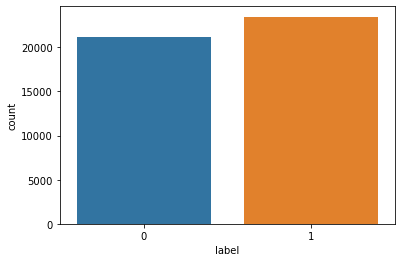

In [13]:
# Visualizing the disribution of true and fake news

sns.countplot(df['label'])

<b> The count of fake news is a bit more than true news. </b>

## Text Preprocessing

In [14]:
# Expanding contractions

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the title, text
df['title'] = df['title'].apply(lambda x:expand_contractions(x))
df['text'] = df['text'].apply(lambda x:expand_contractions(x))

In [15]:
# Converting text to lowercase

df['title'] = df['title'].apply(lambda x:x.lower())
df['text'] = df['text'].apply(lambda x:x.lower())

In [16]:
# Removing digits and words containing digits

df['title'] = df['title'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['text'] = df['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [17]:
# Removing punctuations

df['title'] = df['title'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [18]:
# Removing extra spaces

df['title'] = df['title'].apply(lambda x: re.sub(' +',' ',x))
df['text'] = df['text'].apply(lambda x: re.sub(' +',' ',x))

In [19]:
# Applying lemmatization

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    rev = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text) if w not in stopwords.words('english')]
    rev = ' '.join(rev)
    return rev

df['title'] = df.title.apply(lemmatize_text)
df['text'] = df.text.apply(lemmatize_text)

In [20]:
# Displaying title, text after cleaning

print("Title\n")
for index,text in enumerate(df['title'][0:3]):
    print('Title %d:\n'%(index+1), text)
    
print("\nText\n")
for index,txt in enumerate(df['text'][0:3]):
    print('Text %d:\n'%(index+1), txt)

Title

Title 1:
 u budget fight loom republican flip fiscal script
Title 2:
 u military accept transgender recruit monday pentagon
Title 3:
 senior u republican senator let mr mueller job

Text

Text 1:
 washington reuters head conservative republican faction u congress voted month huge expansion national debt pay tax cut called fiscal conservative sunday urged budget restraint keeping sharp pivot way among republican u representative mark meadow speaking cbs face nation drew hard line federal spending lawmaker bracing battle january return holiday wednesday lawmaker begin trying pas federal budget fight likely linked issue immigration policy even november congressional election campaign approach republican seek keep control congress president donald trump republican want big budget increase military spending democrat also want proportional increase nondefense discretionary spending program support education scientific research infrastructure public health environmental protection trum

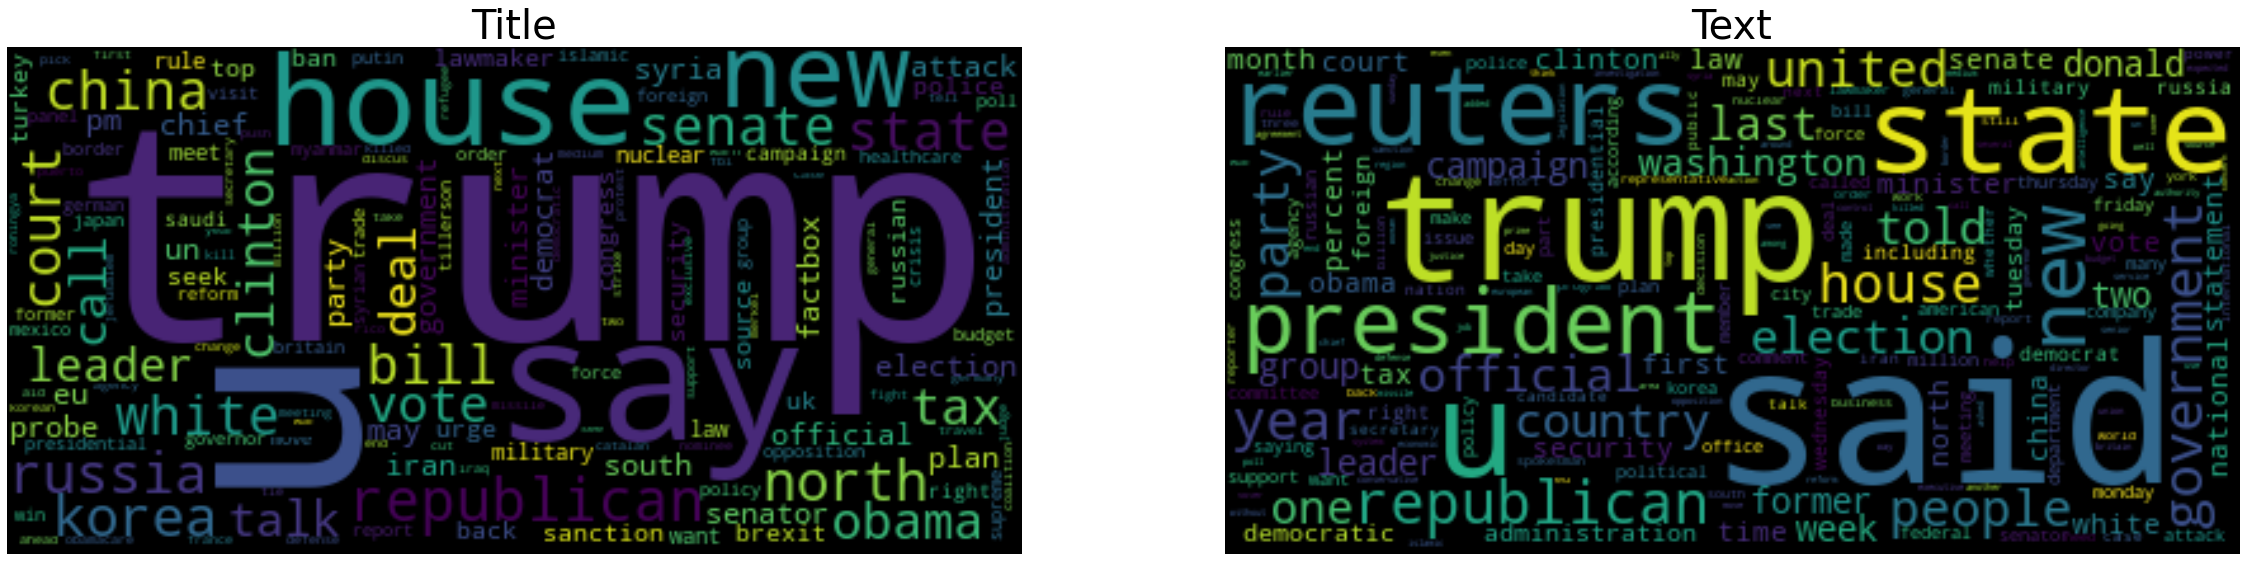

In [21]:
# Wordcloud of title, text in True news

# Cleaned dataframe of True labels
df_true = df[df.label == 0]

title_true = " ".join(tit for tit in df_true['title'])
text_true = " ".join(txt for txt in df_true['text'])

plt.figure(figsize=(40, 30))

# Title
title_cloud = WordCloud(collocations=False, background_color='black').generate(title_true)
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Title", fontsize=40)
plt.imshow(title_cloud, interpolation='bilinear')

# Title
text_cloud = WordCloud(collocations=False, background_color='black').generate(text_true)
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Text", fontsize=40)
plt.imshow(text_cloud, interpolation='bilinear')

<b> Common words in title:- </b>trump, korea, republican, house, russia, say, new, leader, white, senate, etc.


<b> Common words in text:- </b>trump, state, republican, president, said, reuters, party, official, country, people, etc.

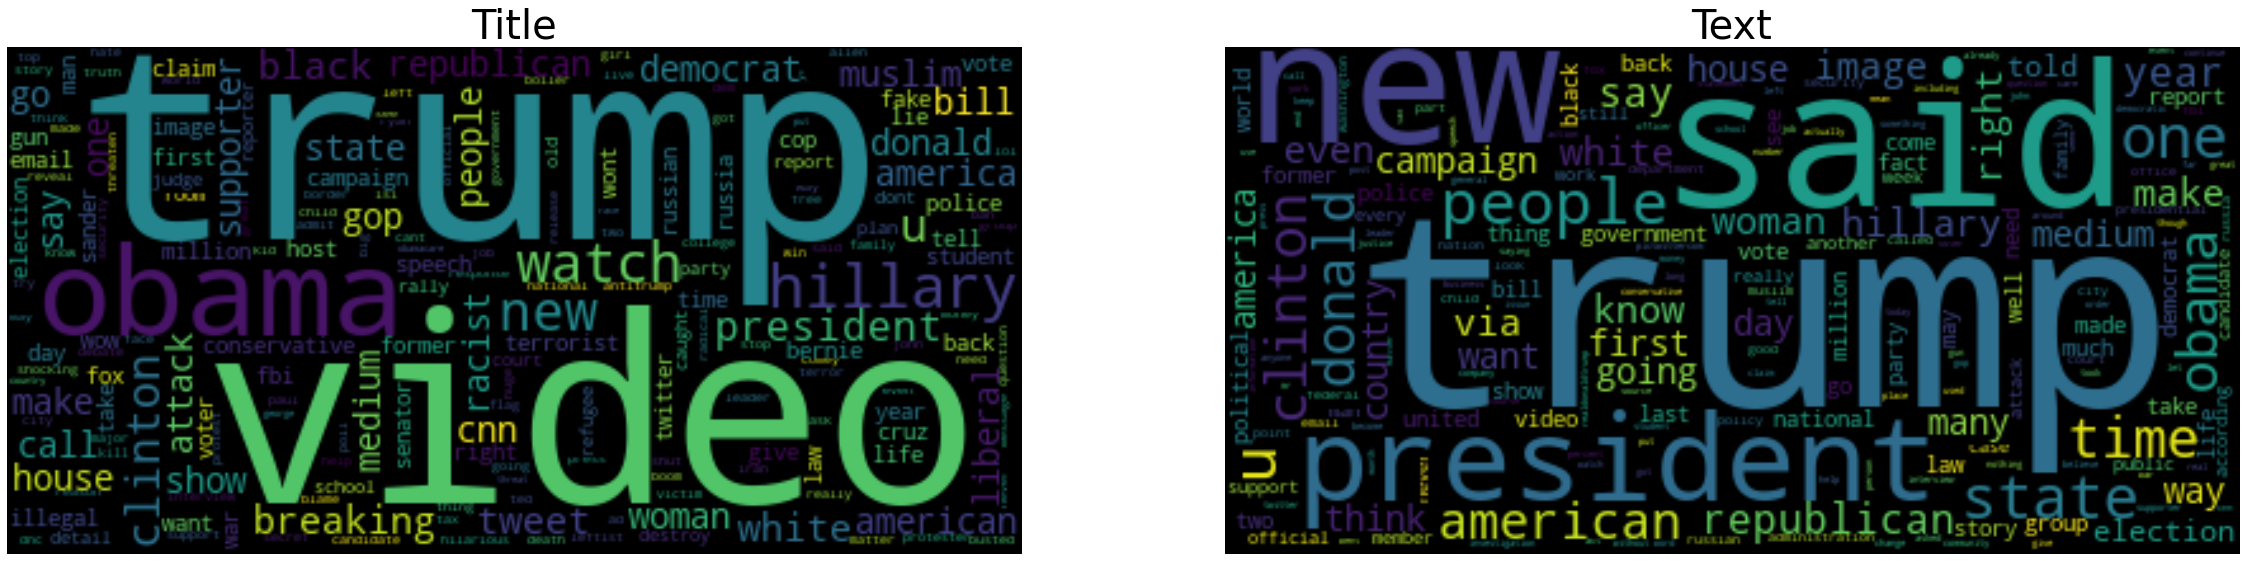

In [22]:
# Wordcloud of title, text in Fake news

# Cleaned dataframe of Fake labels
df_fake = df[df.label == 1]

title_fake = " ".join(tit for tit in df_fake['title'])
text_fake = " ".join(txt for txt in df_fake['text'])

plt.figure(figsize=(40, 30))

# Title
title_cloud = WordCloud(collocations=False, background_color='black').generate(title_fake)
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Title", fontsize=40)
plt.imshow(title_cloud, interpolation='bilinear')

# Title
text_cloud = WordCloud(collocations=False, background_color='black').generate(text_fake)
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Text", fontsize=40)
plt.imshow(text_cloud, interpolation='bilinear')

<b> Common words in title:- </b>trump, video, watch, clinton, obama, tweet, president, woman, muslim, democrat, etc.


<b> Common words in text:- </b>trump, people, said, president, new, obama, state, clinton, time, one, etc.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

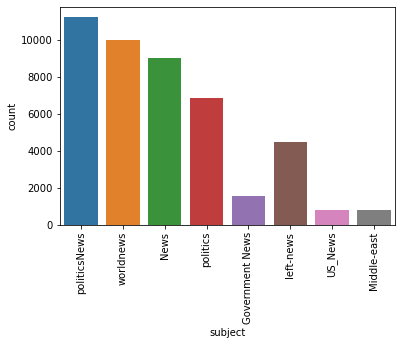

In [23]:
# Subject-wise distriution of news 

sns.countplot(df['subject'])
plt.xticks(rotation=90)

<b> Observations:- </b>

<ul>
    <li>Most of the news in the dataset is politicsNews.</li>
    <li>It is followed by worldNews, News and politics.</li>
    <li>Government News, US_News and Middle-east have less than 2000 records.</li>
</ul>

## Model

In [62]:
tf = TfidfVectorizer(max_features=3000, ngram_range=(1,4))

X = tf.fit_transform(df['text']).toarray()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.01277437, 0.        ,
        0.15652216],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [63]:
y = df['label']

In [64]:
# Splitting the dataset into train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (35751, 3000)
X_test: (8938, 3000)
y_train: (35751,)
y_test: (8938,)


In [65]:
# Training the model using Naive Bayes classifier

nb = MultinomialNB().fit(X_train, y_train)

In [66]:
print("Score of train data:", nb.score(X_train, y_train))
print("Score of test data:", nb.score(X_test, y_test))

Score of train data: 0.9448407037565383
Score of test data: 0.9446184828820765


<b> The model performs well on train as well as test data. </b>

In [67]:
y_pred = nb.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [68]:
# F1 score and accuracy

f1_score = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print("F1 Score:", f1_score)
print("Accuracy Score:", accuracy)

TypeError: 'numpy.float64' object is not callable

In [69]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4290
           1       0.95      0.95      0.95      4648

    accuracy                           0.94      8938
   macro avg       0.94      0.94      0.94      8938
weighted avg       0.94      0.94      0.94      8938



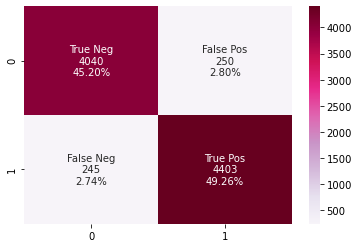

In [70]:
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='PuRd')